<a href="https://colab.research.google.com/github/laoktaviana/ACS-DecisionTree/blob/main/Laily-4algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries and reading features list from ‘kddcup.names’ file.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# reading features list
with open("drive/MyDrive/ACS-UAS/data/kddcup.names.txt", 'r') as f:
	print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
# Appending columns to the dataset and adding a new column name ‘target’ to the dataset.
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [ ]:
# Reading the ‘attack_types’ file.
with open("drive/MyDrive/ACS-UAS/data/training_attack_types.txt", 'r') as f:
	print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
# Creating a dictionary of attack_types
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
"""Reading the dataset(‘kddcup.data_10_percent.gz’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r."""

path = "drive/MyDrive/ACS-UAS/data/kddcup.data_10_percent.gz"                   #check for this file, error here
df = pd.read_csv(path, names = columns)


In [ ]:
# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
# Shape of dataframe and getting data type of each feature
df.shape

(494021, 43)

In [ ]:
# Finding missing values of all features.
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

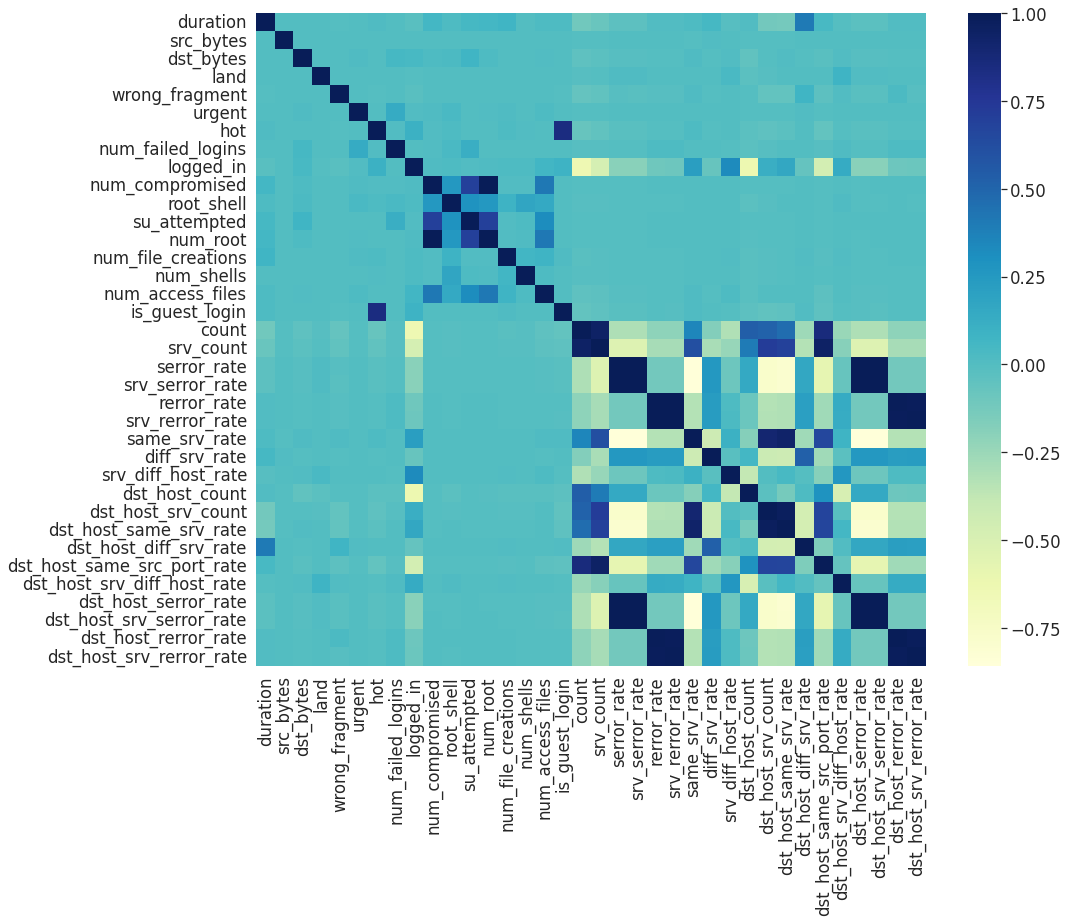

In [ ]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr,cmap='YlGnBu')

plt.show();

In [ ]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

In [ ]:
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

"""Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’."""

'Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.'

In [ ]:
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

"""Remove irrelevant features such as ‘service’ before modelling"""

df.drop('service', axis = 1, inplace = True)

"""## 4. Modelling"""

'## 4. Modelling'

In [ ]:
# Importing libraries and splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Splitting the dataset
df = df.drop(['target', ], axis = 1)
print(df.shape)


(494021, 31)


In [ ]:
# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

"""### Gaussian Naive Bayes
"""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

"""### Decision Tree"""

from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

"""### Random Forest
"""

from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

"""### Logistic Regression
"""

from sklearn.linear_model import LogisticRegression   

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))

"""### Gradient Descent
"""

from sklearn.ensemble import GradientBoostingClassifier

clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

"""### Model Comparison"""

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)
Training time:  0.672590970993042
Testing time:  0.3843395709991455
Train score is: 0.8795114110829804
Test score is: 0.8790384414851528
Training time:  1.4771332740783691
Testing time:  0.045099735260009766
Train score is: 0.9905829108684749
Test score is: 0.9905230421954646
Training time:  10.20972752571106
Testing time:  1.0362615585327148
Train score is: 0.9999788515803912
Test score is: 0.9996749004766081
Training time:  75.03865385055542
Testing time:  0.060144901275634766
Train score is: 0.9935285835997028
Test score is: 0.9935286792985211
Training time:  399.2652585506439
Testing time:  2.824986219406128
Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


'### Model Comparison'

In [ ]:
# Put models in a dictionary
models = { "Gaussian Naive Bayes": GaussianNB(),
                "Decision Tree": DecisionTreeClassifier(criterion ="entropy", max_depth = 4), 
                "Random Forest": RandomForestClassifier(n_estimators = 30),
                "Logistic Regression": LogisticRegression(max_iter = 1200000),
                "Gradient Descent":GradientBoostingClassifier(random_state=0)}

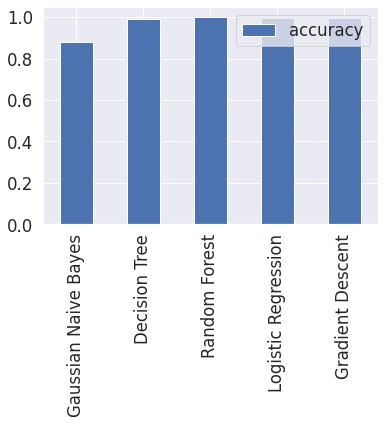

In [ ]:
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train.values.ravel())
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test,
                                                y_train=y_train, y_test=y_test)
model_scores

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

"""### Confusion matrix"""

y_preds = clfr.predict(X_test)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       0.99      0.99      0.99      1348
         r2l       0.99      0.95      0.97       387
         u2r       0.93      0.74      0.82        19

    accuracy                           1.00    163027
   macro avg       0.98      0.93      0.96    163027
weighted avg       1.00      1.00      1.00    163027



array(['dos', 'dos', 'dos', ..., 'normal', 'dos', 'dos'], dtype=object)

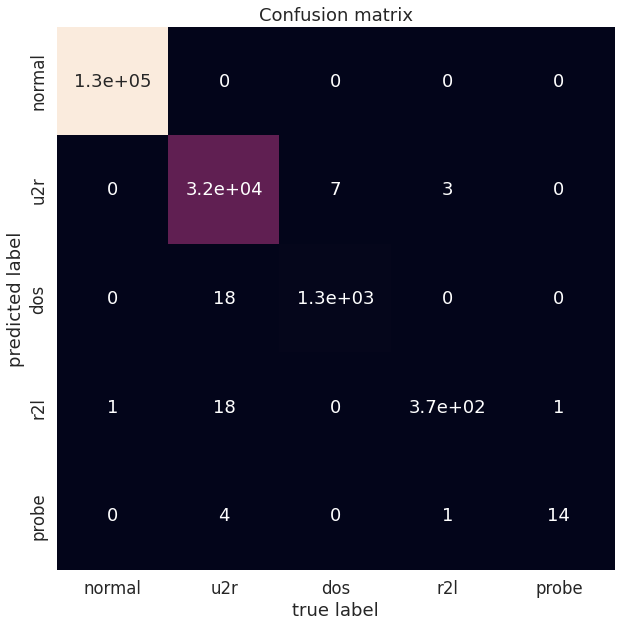

In [ ]:
# Import Seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, # Annotate the boxes
                                xticklabels=df['Attack Type'].unique(),
                                yticklabels=df['Attack Type'].unique(), cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title('Confusion matrix')
    
plot_conf_mat(y_test, y_preds)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

clfr.feature_importances_

y_test.values.ravel()


In [ ]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clfr.feature_importances_ )))
features_dict

{'count': 0.3012729546992778,
 'diff_srv_rate': 0.055507006431353666,
 'dst_bytes': 0.18016027165319246,
 'dst_host_count': 0.04219220533318489,
 'dst_host_diff_srv_rate': 0.013327342305724276,
 'dst_host_same_src_port_rate': 0.02442136405147439,
 'dst_host_srv_count': 0.03571474104445494,
 'dst_host_srv_diff_host_rate': 0.04882899995412445,
 'duration': 0.011432107159502766,
 'flag': 0.0620908442903951,
 'hot': 0.012137633516473244,
 'is_guest_login': 0.0005971318585846711,
 'land': 5.314591398286085e-05,
 'logged_in': 0.04392151847240925,
 'num_access_files': 0.00012916681011190074,
 'num_compromised': 0.005533751983352275,
 'num_failed_logins': 0.0001873893525392538,
 'num_file_creations': 6.139330778203905e-05,
 'num_shells': 1.614433175019415e-05,
 'protocol_type': 0.06587255927606964,
 'rerror_rate': 0.0027640037117777675,
 'root_shell': 6.986291600618074e-05,
 'same_srv_rate': 0.009856795360124094,
 'serror_rate': 0.0051778058392205634,
 'src_bytes': 0.00899236808402521,
 'srv_c

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

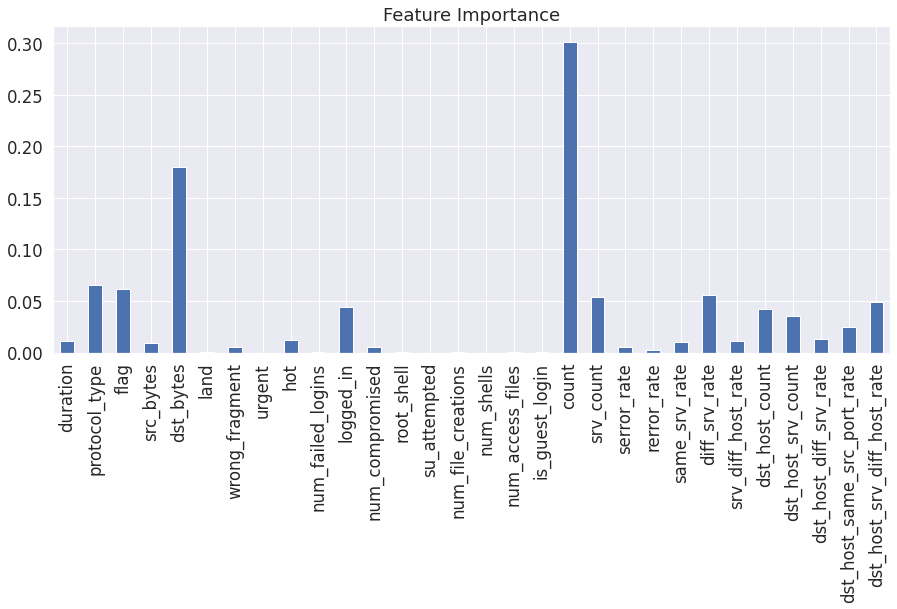

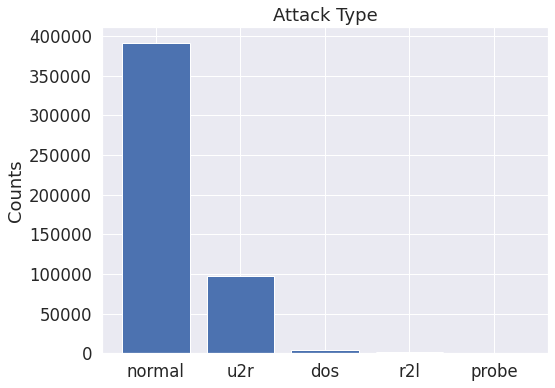

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(figsize=(15, 6),title="Feature Importance", legend=False,);

df['Attack Type']
fix,ax = plt.subplots(figsize=(8,6))
ax.bar(df['Attack Type'].unique(),df['Attack Type'].value_counts())
plt.title('Attack Type')
plt.ylabel('Counts');

df['Attack Type'].value_counts()